Import Everything (Hopefully)

In [4]:
import sys
import pandas as pd
import numpy as np
# !pip install matplotlib
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

# import xgboost
# from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import pickle
import joblib

In [5]:
from sklearn.linear_model import Ridge, LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier
# from xgboost import XGBRegressor, XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, plot_confusion_matrix, plot_roc_curve, classification_report


In [6]:
import sklearn
from sklearn.model_selection import train_test_split
from category_encoders import OneHotEncoder, OrdinalEncoder
# !pip install catboost
# import catboost
# from catboost import CatBoostClassifier

In [4]:
# import json
# df = pd.read_csv("V3_final.csv")

In [5]:
# df = df.drop(columns=["Unnamed: 0"])  

First Check on the Data

In [6]:
# df.shape

(10198, 8)

According to the label encoding fiasco yesterday-- there are still NaNs
We will take a closer look into the two string columsn that the model relies on. 

In [7]:
# No NaNs
# df["category"].value_counts()

film & video    1843
music           1152
dance           1096
games           1069
fashion          974
art              794
publishing       641
technology       567
food             500
photography      333
design           292
theater          268
comics           267
crafts           213
journalism       152
journalisms       37
Name: category, dtype: int64

In [8]:
# No NaNs
# df["sub_category"].value_counts()

narrative film       708
performances         608
jewelry              568
tabletop games       333
video games          269
                    ... 
social practice        2
literary journals      2
digital art            1
bacon                  1
color                  1
Name: sub_category, Length: 140, dtype: int64

In [9]:
# Drop NaN regardless
# df = df.dropna()

In [10]:
# SO-- ABOUT 200 ROWS HAD PROBLEMATIC ISSUES OF NANS OR MESSED UP SYMBLES.....

# df.shape

(9594, 8)

In [31]:
df_export = df.to_csv("FinalClean.csv")

We Finally cleaned the data, now GET THE X AND Y

In [7]:
# Use 3 decimal places in output display
pd.set_option("display.precision", 10)

# Don't wrap repr(DataFrame) across additional lines
pd.set_option("display.expand_frame_repr", False)

# Set max rows displayed in output to 25
pd.set_option("display.max_rows", 10000)

In [8]:
df = pd.read_csv("FinalClean.csv")

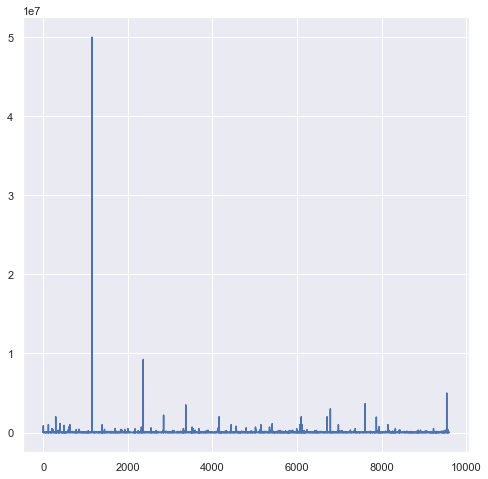

In [9]:
sns.set(rc={"figure.figsize":(8, 8)})
df["goal_in_usd"].plot()
sns.set()
plt.show()

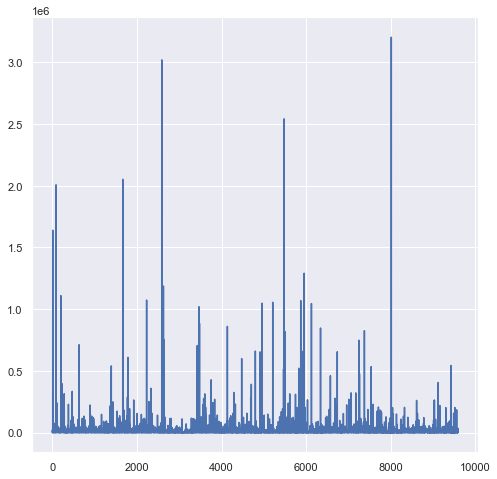

In [10]:
sns.set(rc={"figure.figsize":(8, 8)})
df["usd_pledged"].plot()
sns.set()
plt.show()

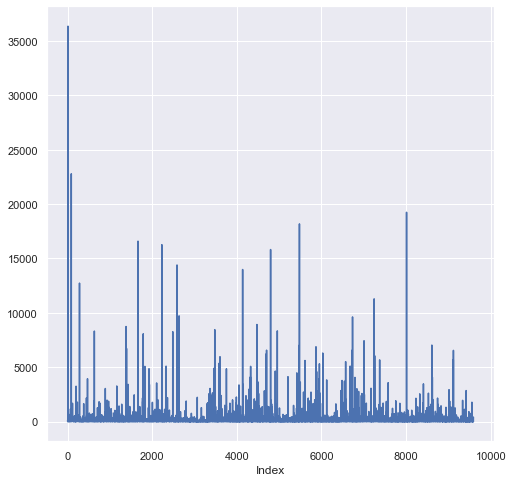

In [19]:
sns.set(rc={"figure.figsize":(8, 8)})
df["backers_count"].plot()
sns.set()
plt.xlabel("Index")
plt.show()

In [14]:
df["backers_count"].mean()

167.54721701063164

In [15]:
df["backers_count"].mode()

0    0
dtype: int64

In [16]:
df["backers_count"].max()

36374

In [11]:
df_eda = df.copy()

In [72]:
# df_eda = df.copy().set_index("category")

In [89]:
# df_group =  df_eda.groupby(df["sub_category"], axis = 0)
df_group = df_eda.groupby(['sub_category'])["usd_pledged"].max()

In [93]:
df_group.head(10000).max()

3203762.0

In [95]:
df_group.head(10000).min()

0.0

In [96]:
df_eda_1 = df_eda.groupby(['sub_category'])["goal_in_usd"].max()

In [97]:
df_eda_1.max()

50000000.0

In [98]:
df_eda_1.min()

50.0

In [99]:
df_eda_1.mean()

729441.6325714285

In [100]:
df_eda_1.mode()

0    100000.0
dtype: float64

In [101]:
df["backers_count"].max()

36374

In [102]:

df["blurb_length"].max()

32

In [103]:
df["campaign_duration"].max()

91

Getting X and Y

In [40]:
df_1 = df.drop(columns=["state"])
X = df_1

In [12]:
X

,backers_count,category,campaign_duration,goal_in_usd,blurb_length,sub_category,usd_pledged
1,0,fashion,60,24282.79,24,jewelry,0.000000
2,134,fashion,30,325.00,14,jewelry,4487.000000
3,114,games,45,850000.00,18,gaming hardware,21696.000000
4,12,film & video,60,10000.00,14,narrative film,1113.000000
5,3,fashion,30,5000.00,10,jewelry,41.000000
...,...,...,...,...,...,...,...
10193,61,art,15,3327.77,10,painting,3704.749988
10194,26,technology,37,34789.30,14,hardware,10399.682730
10195,29,film & video,45,610.00,26,animation,649.000000
10196,1,photography,30,4230.00,15,places,33.839974


In [13]:
y = df["state"]

Start the Train_Test Split

In [14]:
X_train, X_val, y_train, y_val= train_test_split(X, y, test_size = .35, random_state = 42)

1. Back Up the Dataframes for Train and Val
2. Isolate the target columns for label encoding
3. Back Up the target columsn for later matching of elements in two lists...

In [15]:
# Back Up the Dataframes of Train and Val
X_train_1 = X_train.copy()
X_val_1 = X_val.copy()

In [16]:
# Isolated Columns
# Store up the Target Columsn for Label Encoding in Train and Val--- WE WILL PROCESS THESE COLUMNS--
# NOT BACK UPS
X_train_cat = X_train_1["category"]
X_train_sub_cat = X_train_1["sub_category"]
X_val_cat = X_val_1["category"]
X_val_sub_cat = X_val_1["sub_category"]

In [17]:
# ACTUAL BACKUPS OF THE TARGET COLUMNS
X_train_cat_backup = X_train_1["category"]
X_train_sub_cat_backup = X_train_1["sub_category"]
X_val_cat_backup = X_val_1["category"]
X_val_sub_cat_backup = X_val_1["sub_category"]


In [18]:
print('baseline accuracy', y.value_counts(normalize=True).max())

baseline accuracy 0.6340421096518658


Then, For Each Model, Run a 100 Times Accuracy Test Average

In [20]:
X_train_cat = X_train_1["category"]
X_train_sub_cat = X_train_1["sub_category"]
X_val_cat = X_val_1["category"]
X_val_sub_cat = X_val_1["sub_category"]

In [19]:
Encoder = LabelEncoder()

In [21]:
# Label Encode X_train_cat

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in X_train_cat:
        if X_train_cat.dtype == object:
            X_train_cat = le.fit_transform(X_train_cat)
        else:
            pass


In [22]:
# Label Encode X_train_sub_cat 

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in  X_train_sub_cat:
        if  X_train_sub_cat.dtype == object:
             X_train_sub_cat = le.fit_transform(X_train_sub_cat)
        else:
            pass

In [23]:
# X_val_cat

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in X_val_cat:
        if X_val_cat.dtype == object:
            X_val_cat = le.fit_transform(X_val_cat)
        else:
            pass

In [24]:
# X_val_sub_cat
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column_name in X_val_sub_cat:
        if X_val_sub_cat.dtype == object:
            X_val_sub_cat = le.fit_transform(X_val_sub_cat)
        else:
            pass

We Will Put the Encodeed Columns into the X_train and X_val

In [25]:
X_train["category"] = X_train_cat 
X_val["category"] = X_val_cat 
X_train["sub_category"] = X_train_sub_cat
X_val["sub_category"] = X_val_sub_cat 

C:\Users\pflee\AppData\Local\Temp/ipykernel_9356/2289995650.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["category"] = X_train_cat
C:\Users\pflee\AppData\Local\Temp/ipykernel_9356/2289995650.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val["category"] = X_val_cat
C:\Users\pflee\AppData\Local\Temp/ipykernel_9356/2289995650.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [26]:
X_train["category"]

2618     5
3280     5
5212     5
4480    10
472      6
        ..
6219     6
5669     0
5872    13
968      3
7824     4
Name: category, Length: 6236, dtype: int32

In [27]:
X_train["sub_category"] 

2618     64
3280     27
5212     64
4480     92
472      78
       ... 
6219      4
5669     81
5872    130
968     103
7824     96
Name: sub_category, Length: 6236, dtype: int32

In [28]:
X_val["sub_category"] 

9679    114
7925    132
7791    132
9129      9
7137    104
       ... 
6459     55
6145     50
95       82
6938    131
8143     63
Name: sub_category, Length: 3358, dtype: int32

In [29]:
X_val["category"] 

9679     7
7925    10
7791    10
9129    12
7137    10
        ..
6459    13
6145    13
95       3
6938     3
8143     5
Name: category, Length: 3358, dtype: int32

Use Validation Dataset to Extrate a List of Subcategory or Categories

In [33]:
len(X_val["category"]) == len(X_val_1["category"])

True

In [34]:
len(X_val["sub_category"]) == len(X_val_1["sub_category"])

True

Since Lengths Are the same, we can start doing the matching of X_train and X_val numbers with the strings of categories and subcategories

In [35]:
# Here are teh string columns
X_train_cat_backup 
X_train_sub_cat_backup
X_val_cat_backup 
X_val_sub_cat_backup 

9679          spaces
7925     world music
7791     world music
9129       art books
7137            rock
            ...     
6459        hardware
6145         gadgets
95      performances
6938       workshops
8143         jewelry
Name: sub_category, Length: 3358, dtype: object

In [36]:
# Here are the number columns
X_train["category"] 
X_val["category"] 
X_train["sub_category"] 
X_val["sub_category"]

9679    114
7925    132
7791    132
9129      9
7137    104
       ... 
6459     55
6145     50
95       82
6938    131
8143     63
Name: sub_category, Length: 3358, dtype: int32

# We will use list comprehension with validation datasets

In [37]:
X_val_cat_string = X_val_cat_backup 
X_val_sub_cat_string = X_val_sub_cat_backup 


In [46]:
X_val_cat_backup 

9679          food
7925         music
7791         music
9129    publishing
7137         music
           ...    
6459    technology
6145    technology
95           dance
6938         dance
8143       fashion
Name: category, Length: 3358, dtype: object

In [39]:
X_val["category"] 
X_val["sub_category"]

9679    114
7925    132
7791    132
9129      9
7137    104
       ... 
6459     55
6145     50
95       82
6938    131
8143     63
Name: sub_category, Length: 3358, dtype: int32

In [64]:
# DO NOT DO CARTESIAN PRODUCT
# list_category = [[a,b] for a in X_val["category"] for b in X_val_cat_string]


df_val_match_sub = pd.concat([X_val_sub_cat_string, X_val["sub_category"]], axis = 1)


In [65]:
df_val_match_sub = pd.DataFrame(df_val_match_sub )

In [76]:
df_tuple_sub_index = df_val_match_sub.set_index(["sub_category"])

In [78]:
type(list(df_tuple_sub_index.index))

list

In [80]:
sub_cat_labels = list(set(list(df_tuple_sub_index.index)))

In [81]:
sub_cat_labels

[('public art', 95),
 ('gadgets', 50),
 ('jewelry', 63),
 ('product design', 94),
 ('metal', 70),
 ('art books', 9),
 ('nonfiction', 78),
 ('anthologies', 5),
 ('candles', 15),
 ('food trucks', 48),
 ('kids', 64),
 ('video art', 124),
 ('performance art', 81),
 ('crochet', 28),
 ('diy', 30),
 ('painting', 79),
 ('childrenswear', 18),
 ('punk', 96),
 ('comic books', 22),
 ('playing cards', 87),
 ('workshops', 131),
 ('camera equipment', 14),
 ('sound', 112),
 ('apparel', 6),
 ('textiles', 118),
 ('places', 86),
 ('accessories', 1),
 ('spaces', 114),
 ('graphic novels', 54),
 ('makerspaces', 69),
 ('horror', 57),
 ('farms', 43),
 ('music videos', 74),
 ('pottery', 91),
 ('experimental', 37),
 ('stationery', 115),
 ('thrillers', 119),
 ('woodworking', 130),
 ('people', 80),
 ('apps', 7),
 ('plays', 88),
 ('world music', 132),
 ('calendars', 13),
 ('faith', 39),
 ('indie rock', 60),
 ('musical', 75),
 ('fantasy', 41),
 ('fabrication tools', 38),
 ('web', 127),
 ('zines', 134),
 ("farmer's 

In [88]:
df_val_match_cat = pd.concat([X_val_cat_backup , X_val["category"]], axis = 1)

In [92]:
df_val_match_cat = df_val_match_cat.set_index("category")

In [93]:
set(df_val_match_cat.index)

{('art', 0),
 ('comics', 1),
 ('crafts', 2),
 ('dance', 3),
 ('design', 4),
 ('fashion', 5),
 ('film & video', 6),
 ('food', 7),
 ('games', 8),
 ('journalism', 9),
 ('music', 10),
 ('photography', 11),
 ('publishing', 12),
 ('technology', 13),
 ('theater', 14)}

#Do the Modeling

In [82]:
rf = RandomForestClassifier(n_estimators=250, random_state=42, max_depth=32, max_leaf_nodes=3500, n_jobs=-1, max_samples=.8)

model_rf = make_pipeline(SimpleImputer(strategy='constant'), 
                        rf)

model_rf.fit(X_train, y_train)

print('Training acc', accuracy_score(y_train, model_rf.predict(X_train)))
print('Validation acc', accuracy_score(y_val, model_rf.predict(X_val)))

Training acc 1.0
Validation acc 0.9874925550923168


<AxesSubplot:xlabel='Reduction in Gini Impurity'>

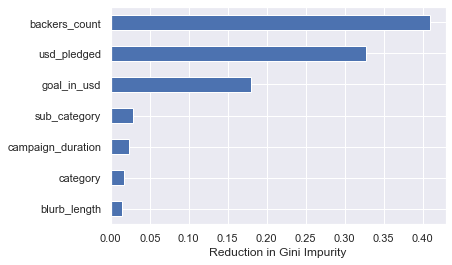

In [84]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
bestimator = model_rf.named_steps['randomforestclassifier'].feature_importances_
# importances = bestimator.named_steps['randomforestclassifier'].feature_importances_
features = X_train.columns
sns.set()
feat_imp = pd.Series(bestimator, index=features).sort_values(ascending=False)
# feat_imp.tail(10).plot(kind='barh')
plt.xlabel('Reduction in Gini Impurity');
# bestimator
# features
df_features = pd.DataFrame(feat_imp, columns=['Importance'])
df_features['Importance'].sort_values(ascending=True).plot(kind="barh")

Get the Unique Values of the Categories and Subcategories

In [24]:
df_cat = pd.read_csv("code_for_category.csv")
df_sub_cat = pd.read_csv("sub_category.csv")

In [25]:
set_category = set(df_cat.index)
set_sub_category = set(df_sub_cat.index)

Look Further into the Analyses

In [85]:
print(classification_report(y_val, model_rf.predict(X_val)))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1213
           1       0.98      1.00      0.99      2145

    accuracy                           0.99      3358
   macro avg       0.99      0.98      0.99      3358
weighted avg       0.99      0.99      0.99      3358



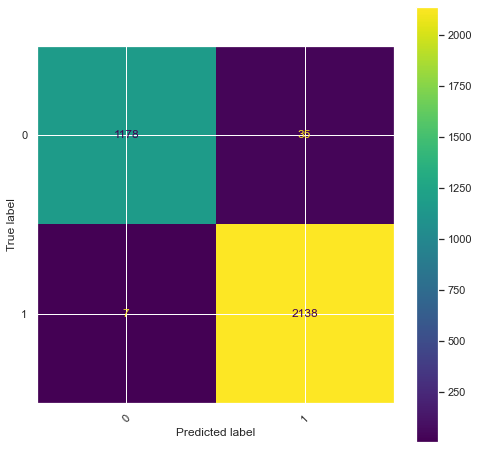

In [86]:
sns.set(rc={"figure.figsize":(8, 8)})

plot_confusion_matrix(model_rf, 
                      X_val, 
                      y_val,
                      values_format='.0f')
                      
plt.xticks(rotation = 45)
# from sklearn.pipeline import make_pipeline
plt.show()

In [29]:
# # Code on Partial Dependence
!pip install matplotlib
!pip install pdpbox
from pdpbox.pdp import pdp_isolate, pdp_plot, pdp_interact, pdp_interact_plot

# # ONE FEATURE
feature = "backers_count"

isolate = pdp_isolate(
    model_rf,
    dataset = X_val,
    model_features = X_val.columns,
    feature=feature)
pdp_plot(isolate, feature_name=feature)
pdp_interact_plot(isolate, plot_type='grid', feature_names=feature)

# Two Features as Grid
features = ["backers_count", "usd_pledged"]

interact = pdp_interact(
    model_rf,
    dataset = X_val,
    model_features = X_val.columns,
    features=features
)

pdp_interact_plot(interact, plot_type='grid', feature_names=features)


# from pdpbox import pdp, get_dataset

# test_otto = get_dataset.otto()
# otto_data = test_otto['data']
# otto_features = test_otto['features']
# otto_model = test_otto['rf_model']
# otto_target = test_otto['target']

# pdp_feat_67_rf = pdp.pdp_isolate(model=otto_model,
#                                  dataset=otto_data,
#                                  model_features=otto_features,
#                                  feature='feat_67')
# fig, axes = pdp.pdp_plot(pdp_isolate_out=pdp_feat_67_rf,
#                          feature_name='feat_67',
#                          center=True,
#                          x_quantile=True,
#                          ncols=3,
#                          plot_lines=True,
#                          frac_to_plot=100)



In [30]:
# import xgboost
# import shap

# # train XGBoost model
# # X,y = shap.datasets.adult()
# # model = xgboost.XGBClassifier().fit(X, y)

# # compute SHAP values
# explainer = shap.Explainer(model_rf, X_val)
# shap_values = explainer(X_val)


# shap.plots.waterfall(shap_values[0])


Let's just use Random Forest Classifier since all models overfit due to data structure or data leakage issues...we need more features to tell our stories. 

In [87]:
from joblib import dump
dump(model_rf, "model_rf_label", compress=True)

['model_rf_label']

In [33]:
from joblib import load
model = load('model_rf_3')

In [34]:
model.predict(X_val)

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [35]:
model.predict_proba(X_val)

array([[0.984, 0.016],
       [0.992, 0.008],
       [0.912, 0.088],
       ...,
       [0.   , 1.   ],
       [0.172, 0.828],
       [0.004, 0.996]])

In [78]:
# XGBoost

model_xgb = make_pipeline(SimpleImputer(strategy="mean"),
                       XGBClassifier(random_state=42))

model_xgb.fit(X_train, y_train)

print('Training acc', accuracy_score(y_train, model_xgb.predict(X_train)))
print('Validation acc', accuracy_score(y_val, model_xgb.predict(X_val)))

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[17:44:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training acc 1.0
Validation acc 0.9949579831932773


<AxesSubplot:xlabel='Reduction in Gini Impurity'>

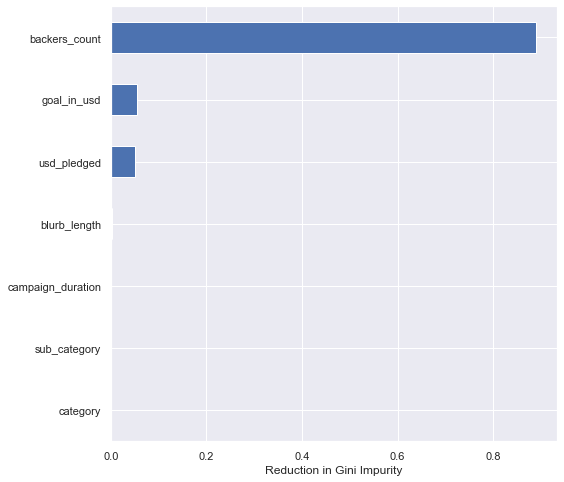

In [79]:
bestimator = model_xgb.named_steps['xgbclassifier'].feature_importances_
# importances = bestimator.named_steps['randomforestclassifier'].feature_importances_
features = X_train.columns
sns.set()
feat_imp = pd.Series(bestimator, index=features).sort_values(ascending=False)
# feat_imp.tail(10).plot(kind='barh')
plt.xlabel('Reduction in Gini Impurity');
# bestimator
# features
df_features = pd.DataFrame(feat_imp, columns=['Importance'])
df_features['Importance'].sort_values(ascending=True).plot(kind="barh")

In [80]:
model_gb = make_pipeline(SimpleImputer(strategy="mean"),
                       GradientBoostingClassifier(random_state=42))

model_gb.fit(X_train, y_train)

print('Training acc', accuracy_score(y_train, model_gb.predict(X_train)))
print('Validation acc', accuracy_score(y_val, model_gb.predict(X_val)))

Training acc 0.9962281231140615
Validation acc 0.9890756302521009


<AxesSubplot:xlabel='Reduction in Gini Impurity'>

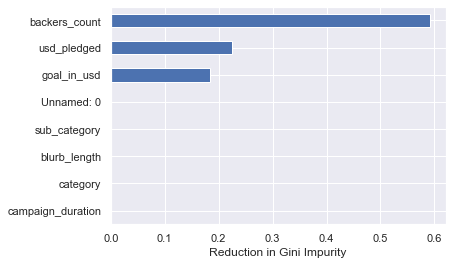

In [69]:
bestimator = model_gb.named_steps['gradientboostingclassifier'].feature_importances_
bestimator
# importances = bestimator.named_steps['gradientboostingclassifier'].feature_importances_
features = X_train.columns
feat_imp = pd.Series(bestimator, index=features).sort_values(ascending=False)
# feat_imp.tail(10).plot(kind='barh')
plt.xlabel('Reduction in Gini Impurity');
# bestimator
# features
df_features = pd.DataFrame(feat_imp, columns=['Importance'])
df_features['Importance'].sort_values(ascending=True).plot(kind="barh")

We can only use random forest classifier because it is the only model using more than 5 features in this easily overfitting scenario